A1.5_588359

DIEGO MARCELO GONZALEZ LUJAN IMT 588359

1. En este codigo utilice la libreria pandas para leer el achivo llamado Calificaciones. Luego imprimi el tamano del DataFrame usando df.shape para conocer sus dimensiones. Tambien imprimi el numero de dimensiones del DataFrame y el tipo de datos de cada columna para identificar si contienen valores numericos (enteros) o cadenas de texto(string). 

In [14]:
#importar la libreria en pandas( pandas ayuda en facilitar el analisis y la manipulacion de datos de tablas y de estructuras) 
import pandas as pd 

#cargar el archivo csv a un dataframe el pd.read es una biblioteca de Pandas que se utiliza para leer datos de diferentes archivos y luego los convierte en data frames de pandas. 
df = pd.read_csv('Calificaciones.csv')

print("Dimensiones del dataframe: ", df.shape)

print("\nTipos de datos de cada variable:")
print(df.dtypes)

Dimensiones del dataframe:  (395, 10)

Tipos de datos de cada variable:
Escuela           object
Sexo              object
Edad               int64
HorasDeEstudio     int64
Reprobadas         int64
Internet          object
Faltas             int64
G1                 int64
G2                 int64
G3                 int64
dtype: object


2. Este codigo convierti las variables categoricas en una forma adecuada para un modelo de regresion. La columna 'Sexo' lo converti en un valor entero cambiando la F y H por 0 y 1 lo cual hice lo mismo con la columna internet de no y yes a 0 y 1. Para la columna Escuela se usan variables para representar las categorias con valores binarios. Luego imprimi las primeras 5 filas del DataFrame. 

In [8]:
df = pd.read_csv('Calificaciones.csv')

df['Sexo'] = df['Sexo'].map({'F':0,'H':1})
df['Internet']=df['Internet'].map({'no':0,'yes':1})
df = pd.get_dummies(df,columns=['Escuela'], drop_first=True)

print(df.head(5))

   Sexo  Edad  HorasDeEstudio  Reprobadas  Internet  Faltas  G1  G2  G3  \
0   0.0    18               2           0         0       6   5   6   6   
1   0.0    17               2           0         1       4   5   5   6   
2   0.0    15               2           3         1      10   7   8  10   
3   0.0    15               3           0         1       2  15  14  15   
4   0.0    16               2           0         0       4   6  10  10   

   Escuela_MS  
0       False  
1       False  
2       False  
3       False  
4       False  


3. En este codigo calcule el rango intercuatratilco de la columna Faltas para identificar valores atipicos. Para hacer esto tenia que tener el primer y tercer cuatril para calcularlo, luego determine los limites superiores e inferiores los cuales se usan para detectar valores fuera de este rango. Mi codigo indica que si los valores atipicos se deben a errores de captura o no tienen justificacion, se eliminaran del conjunto de datos, pero si existen situaciones validas que justifiquen esos valores se mandentran en el conjunto para preservar la informacion relevante. 

In [7]:
import pandas as pd 

df = pd.read_csv('Calificaciones.csv')

Q1 = df['Faltas'].quantile(0.25)
Q3 = df['Faltas'].quantile(0.75)
IQR = Q3 - Q1

Limite_inferior = Q1 - 3*IQR
Limite_superior = Q3 + 3*IQR

atipicos = df[(df['Faltas'] < Limite_inferior) | (df['Faltas'] > Limite_superior)]

print("Valores atipicos en Faltas: ")
print(atipicos)

#DEcision para saber que hacer con los valores atipicos 

print("Decision: " )
print("Si los valores atipicos son errores de captura o sin justificacion, seran eliminados. " )
print("Pero si hay situcaciones validas se mantendran para no perder la informacion relevante." )

df_sin_atipicos = df.drop(atipicos.index) 

print("Dataframe sin valores atipicos en la seccion de Faltas: " )
print(df_sin_atipicos.head()) 

Valores atipicos en Faltas: 
    Escuela Sexo  Edad  HorasDeEstudio  Reprobadas Internet  Faltas  G1  G2  \
74       GP    F    16               2           0      yes      54  11  12   
183      GP    F    17               2           0      yes      56   9   9   
276      GP    F    18               2           0      yes      75  10   9   
307      GP    M    19               1           1      yes      38   8   9   
315      GP    F    19               3           1      yes      40  13  11   

     G3  
74   11  
183   8  
276   9  
307   8  
315  11  
Decision: 
Si los valores atipicos son errores de captura o sin justificacion, seran eliminados. 
Pero si hay situcaciones validas se mantendran para no perder la informacion relevante.
Dataframe sin valores atipicos en la seccion de Faltas: 
  Escuela Sexo  Edad  HorasDeEstudio  Reprobadas Internet  Faltas  G1  G2  G3
0      GP    F    18               2           0       no       6   5   6   6
1      GP    F    17               2 

4. En este codigo genera una matriz correlacion para todas las variables numericas y la visualiza como un grafico de calor, donde se muestran las correlaciones entre las variables. Los valores numericos de la correlacion tambien se muestran dentro de cada celda del grafico, facilitando la interpretacion de las relaciones entre las variables.

Libreria Numpy: Es una biblioteca que trabaja con arrays multidimensionales y matrices, ademas de ofrecer una gran coleccion de funciones matematicas. Este codigo sirve para el analisis numerico y cientifico ya que tiene una herramienta que trabaja con grandes volumenes de datos numericos, realizar calculos matematicos complejos y manejar operaciones de algebra lineal. 

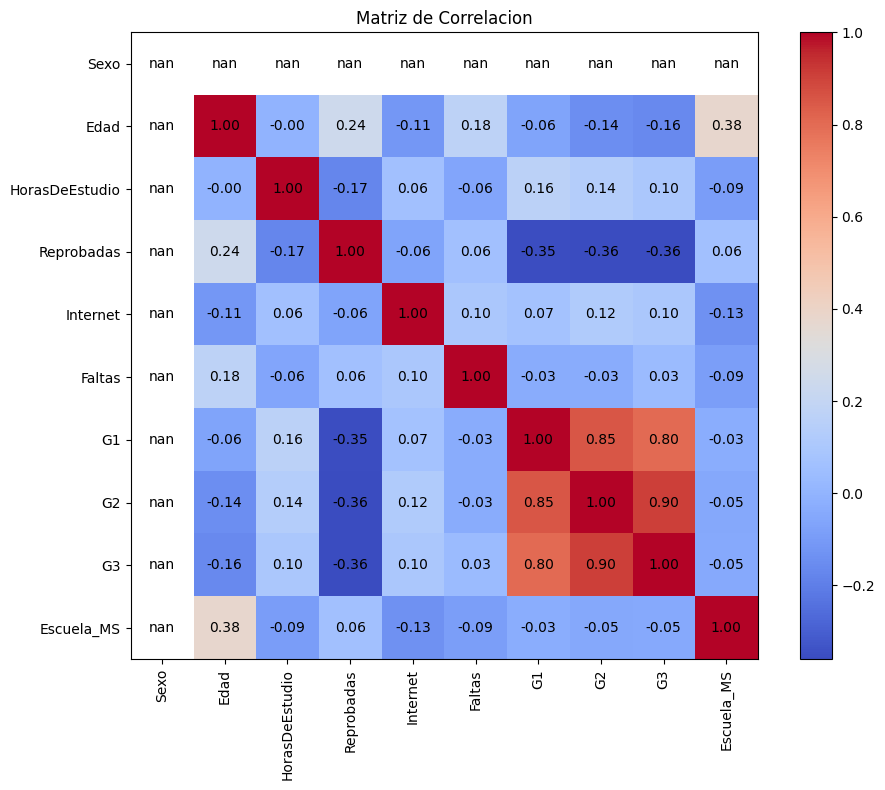

In [14]:
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np

df = pd.read_csv('Calificaciones.csv')

df['Sexo'] = df['Sexo'].map({'F':0,'H':1})
df['Internet']=df['Internet'].map({'no':0,'yes':1})
df = pd.get_dummies(df,columns=['Escuela'], drop_first=True)

matriz_correlacion = df.corr()

plt.figure(figsize=(10,8))
plt.imshow(matriz_correlacion, cmap='coolwarm', interpolation='none')
plt.colorbar()

etiquetas = matriz_correlacion.columns 
plt.xticks(np.arange(len(etiquetas)), etiquetas, rotation = 90)
plt.yticks(np.arange(len(etiquetas)), etiquetas)

for i in range(len(etiquetas)):
    for j in range(len(etiquetas)):
        plt.text(j,i, f'{matriz_correlacion.iloc[i,j]:.2f}', ha = 'center', va = 'center', color = 'black')

plt.title('Matriz de Correlacion')
plt.tight_layout()
plt.show()

5. En esta parte del codigo decidi elegir 4 tipos de variables que pueden tener un efecto al conbinar su resultado los cuales son "HorasDeEstudios y Internet" y "Sexo y G2", elegi HorasDeEstudio y Internet para cer si el acceso al internet modifica el efecto de las horas de estudio y en Sexo y G2 queria ver si el rendimiento en el segundo periodo varia segun el sexo del estudiante. En la siguiente grafica podemos ver que los estudiantes con acceso a internet muestran valores distintos a cero, lo que indica que su carga de estudio podria verse infleucniada por esa conectividad y podria ayudarnos pero en la seccion de Sexo y G2 no hay un impacto en lo absoluto. 

In [21]:
import pandas as pd 

df = pd.read_csv('Calificaciones.csv')

df['Sexo'] = df['Sexo'].map({'F':0,'H':1})
df['Internet']=df['Internet'].map({'no':0,'yes':1})
df = pd.get_dummies(df,columns=['Escuela'], drop_first=True)

df['HorasDeEstudio_Internet'] = df['HorasDeEstudio'] * df['Internet']
df['Sexo_G2'] = df['Sexo'] * df['G2']

print(df.head(5))

   Sexo  Edad  HorasDeEstudio  Reprobadas  Internet  Faltas  G1  G2  G3  \
0   0.0    18               2           0         0       6   5   6   6   
1   0.0    17               2           0         1       4   5   5   6   
2   0.0    15               2           3         1      10   7   8  10   
3   0.0    15               3           0         1       2  15  14  15   
4   0.0    16               2           0         0       4   6  10  10   

   Escuela_MS  HorasDeEstudio_Internet  Sexo_G2  
0       False                        0      0.0  
1       False                        2      0.0  
2       False                        2      0.0  
3       False                        3      0.0  
4       False                        0      0.0  


6. En este codigo entrene un modelo de regresion lineal para predecir las calificaciones G3, lo primero que hice es rellenar valores que faltan con la media, separa las variables independientes y dependientes y divide los datos en entrenamiento y prueba. Luego realize una prediccion y compare los resultados reales y predichos en una grafica. Finalmente muestra los coeficientes que indican la influencia de cada variable en las calificaciones. 

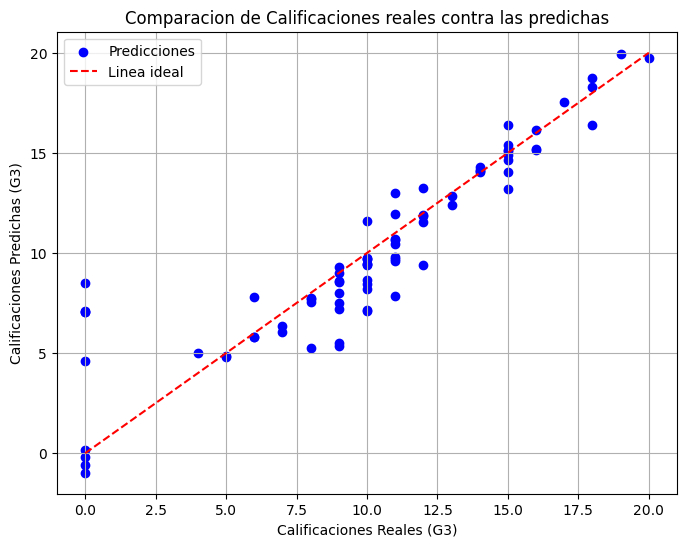

                   Variable  Coeficientes
0                      Sexo      0.000000
1                      Edad     -0.146855
2            HorasDeEstudio     -1.034405
3                Reprobadas     -0.430360
4                  Internet     -2.053908
5                    Faltas      0.038159
6                        G1      0.134556
7                        G2      0.972316
8                Escuela_MS      0.302707
9   HorasDeEstudio_Internet      1.056254
10                  Sexo_G2      0.000000


In [29]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Rellenar valores NaN con la media de cada columna numerica
df = df.fillna(df.mean(numeric_only=True))

X = df.drop(['G3'],axis=1)
Y = df['G3']

train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size=0.2, random_state=21)
modelo = LinearRegression()
modelo.fit(train_X,train_Y)

y_pred = modelo.predict(test_X)

plt.figure(figsize=(8,6))
plt.scatter(test_Y, y_pred, color='blue', label='Predicciones')
plt.plot([test_Y.min(), test_Y.max()],[test_Y.min(), test_Y.max()], 'r--', label='Linea ideal')
plt.xlabel('Calificaciones Reales (G3)')
plt.ylabel('Calificaciones Predichas (G3)')
plt.title('Comparacion de Calificaciones reales contra las predichas' )
plt.legend()
plt.grid(True)
plt.show()

coeficientes = pd.DataFrame({'Variable' : X.columns, 'Coeficientes':modelo.coef_})
print(coeficientes) 
